In [47]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [54]:
r1_scannet_results = json.load(open("results/scannet_r1_mega_synthetic.json","r"))
r2_scannet_results = json.load(open("results/scannet_r2_mega_synthetic.json","r"))
r3_scannet_results = json.load(open("results/scannet_r3_mega_synthetic.json","r"))

key = "auc_10"
r1_scannet = 100*np.array([d[key] for d in r1_scannet_results])
r2_scannet = 100*np.array([d[key] for d in r2_scannet_results])
r3_scannet = 100*np.array([d[key] for d in r3_scannet_results])

r1_scannet_m = r1_scannet.mean()
r1_scannet_s = r1_scannet.std()

r2_scannet_m = r2_scannet.mean()
r2_scannet_s = r2_scannet.std()

r3_scannet_m = r3_scannet.mean()
r3_scannet_s = r3_scannet.std()


In [55]:
r1_yfcc100m_results = json.load(open("results/yfcc100m_r1_mega_synthetic.json","r"))
r2_yfcc100m_results = json.load(open("results/yfcc100m_r2_mega_synthetic.json","r"))
r3_yfcc100m_results = json.load(open("results/yfcc100m_r3_mega_synthetic.json","r"))

r1_yfcc100m = 100*np.array([d[key] for d in r1_yfcc100m_results])
r2_yfcc100m = 100*np.array([d[key] for d in r2_yfcc100m_results])
r3_yfcc100m = 100*np.array([d[key] for d in r3_yfcc100m_results])

r1_yfcc100m_m = r1_yfcc100m.mean()
r1_yfcc100m_s = r1_yfcc100m.std()


r2_yfcc100m_m = r2_yfcc100m.mean()
r2_yfcc100m_s = r2_yfcc100m.std()

r3_yfcc100m_m = r3_yfcc100m.mean()
r3_yfcc100m_s = r3_yfcc100m.std()

In [56]:
r1_mega1500_results = json.load(open("results/mega1500_r1_mega.json","r"))
r2_mega1500_results = json.load(open("results/mega1500_r2_mega.json","r"))
r3_mega1500_results = json.load(open("results/mega1500_r3_mega.json","r"))

r1_mega1500 = 100*np.array([d[key] for d in r1_mega1500_results])
r2_mega1500 = 100*np.array([d[key] for d in r2_mega1500_results])
r3_mega1500 = 100*np.array([d[key] for d in r3_mega1500_results])

r1_mega1500_m = r1_mega1500.mean()
r1_mega1500_s = r1_mega1500.std()

r2_mega1500_m = r2_mega1500.mean()
r2_mega1500_s = r2_mega1500.std()

r3_mega1500_m = r3_mega1500.mean()
r3_meg1500_s = r3_mega1500.std()

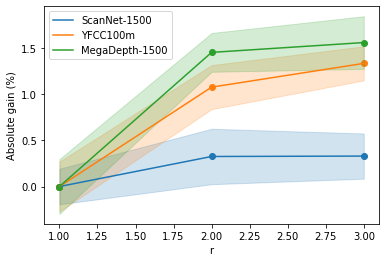

In [57]:
score = np.array([[r1_scannet_m,r2_scannet_m,r3_scannet_m],[r1_yfcc100m_m,r2_yfcc100m_m,r3_yfcc100m_m],[r1_mega1500_m,r2_mega1500_m,r3_mega1500_m]]).T
score = score-score[:1]
stds = np.array([[r1_scannet_s,r2_scannet_s,r3_scannet_s],[r1_yfcc100m_s,r2_yfcc100m_s,r3_yfcc100m_s],[r1_mega1500_s,r2_mega1500_s,r3_mega1500_s]]).T


lb = score-stds
ub = score+stds

r = np.tile(np.array([1,2,3])[:,None],(1,3))
plt.plot(r,score)
cs = {0:"C0",1:"C1",2:"C2"}
for k in range(3):
    plt.scatter(r[:,k],score[:,k],c=cs[k])
    plt.fill_between(r[:,k],lb[:,k],ub[:,k],alpha=0.2,color=cs[k])
plt.legend(("ScanNet-1500","YFCC100m","MegaDepth-1500"))
plt.xlabel("r")
plt.ylabel("Absolute gain (%)")
plt.savefig("r-effect.pdf")